# M5 - W3 Assignment: Creating insights from the data


### Imports

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# PART I : Explore product rating

In [46]:
df=pd.read_csv('/Users/apple/Downloads/books.csv',on_bad_lines='skip')

In [47]:
df.index = df['bookID']


In [48]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 12 columns


In [49]:

df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


bookID Contains the unique ID for each book/series

title contains the titles of the books

authors contains the author of the particular book

average_rating the average rating of the books, as decided by the users

ISBN ISBN(10) number, tells the information about a book - such as edition and publisher

ISBN 13 The new format for ISBN, implemented in 2007. 13 digits

language_code Tells the language for the books

Num_pages Contains the number of pages for the book

Ratings_count Contains the number of ratings given for the book

text_reviews_count Has the count of reviews left by users

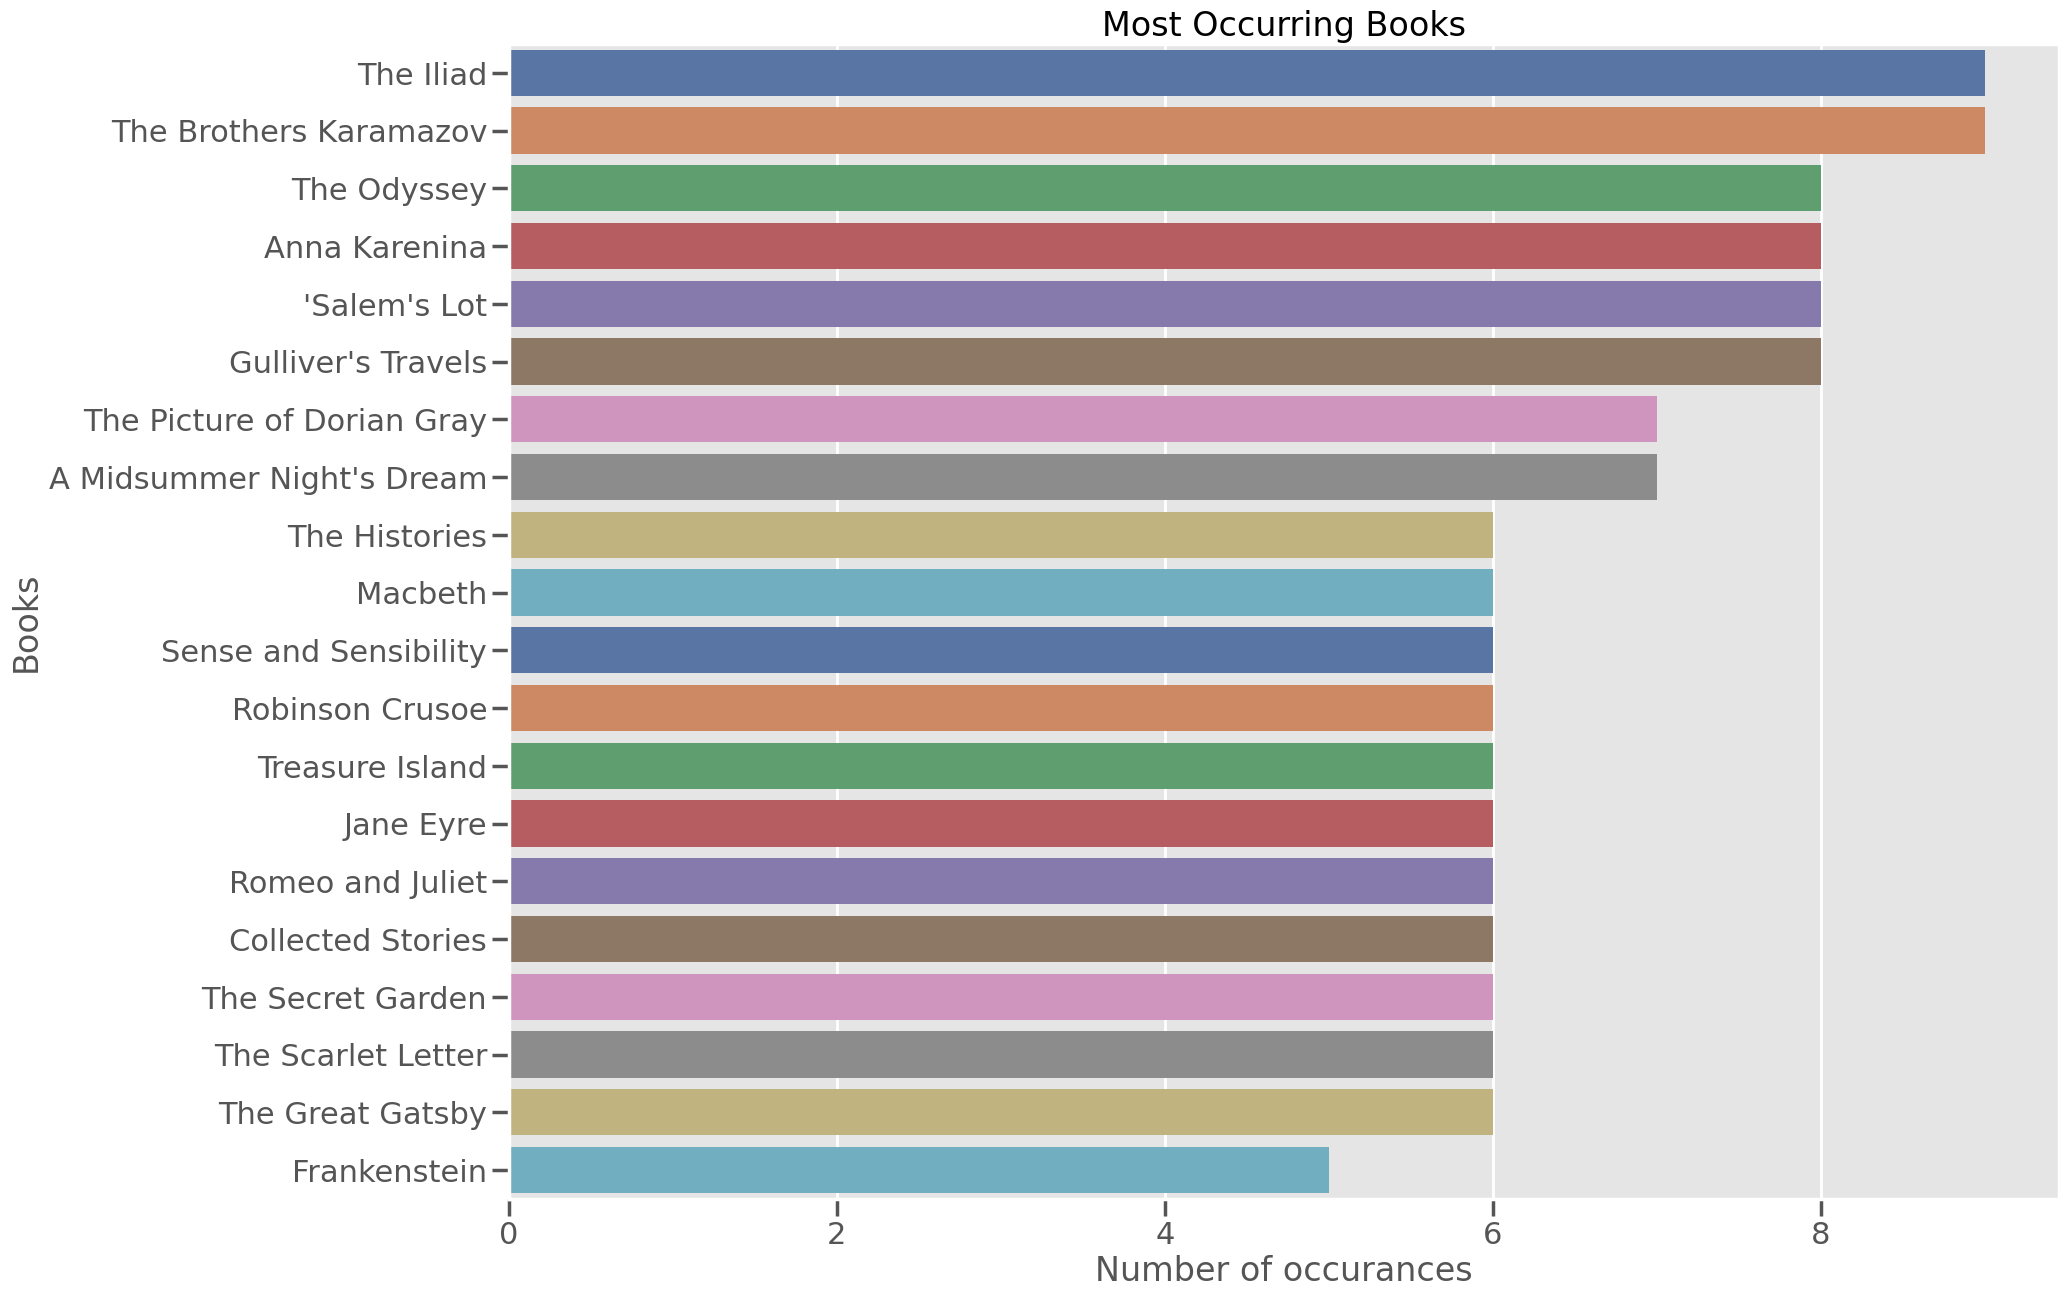

In [50]:
#Taking the first 20:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep',hue=books.index)
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

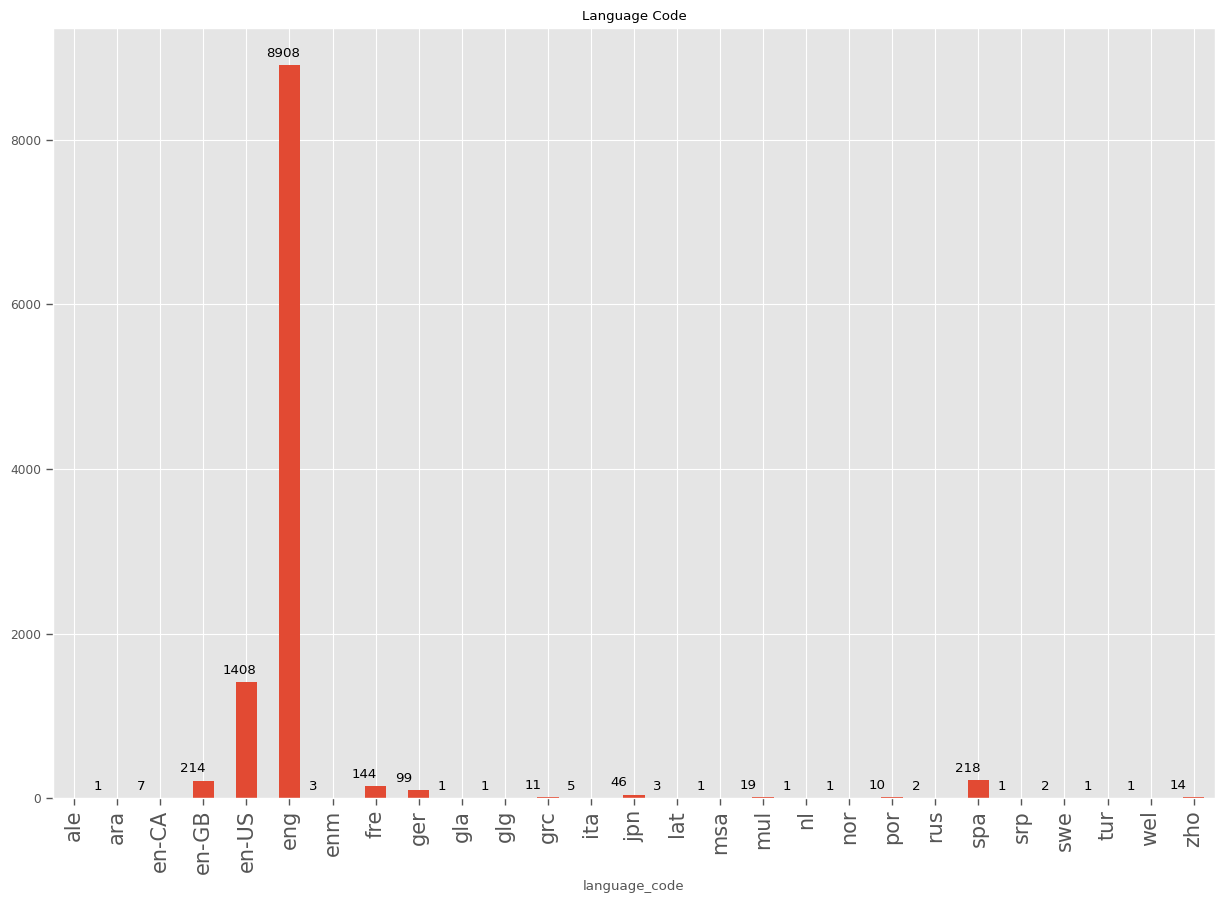

In [51]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

<Axes: xlabel='ratings_count', ylabel='title'>

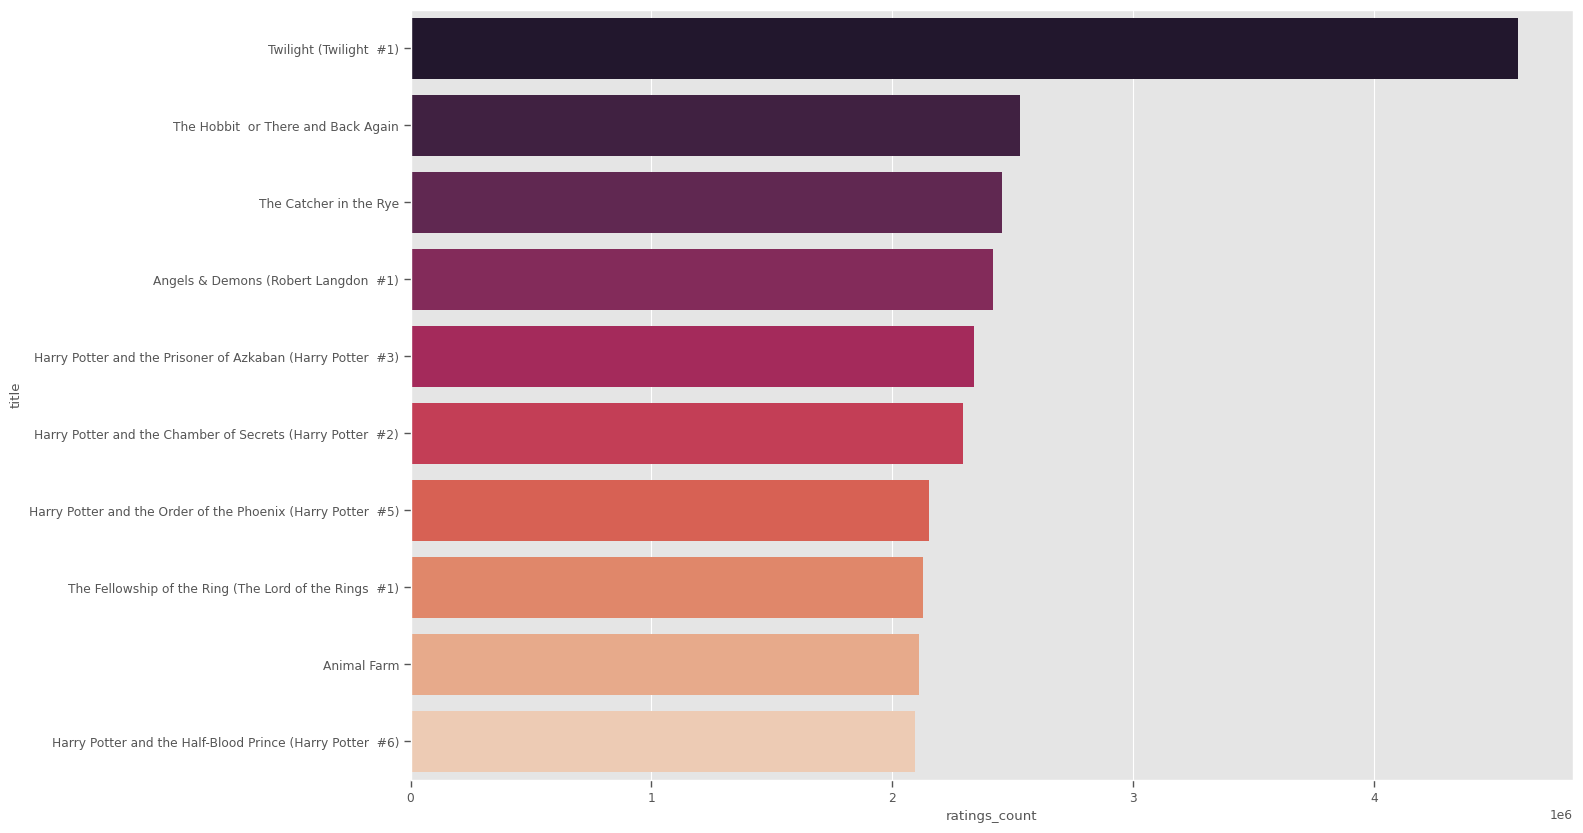

In [52]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(x=most_rated['ratings_count'],y= most_rated.index, palette='rocket',hue=most_rated.index)

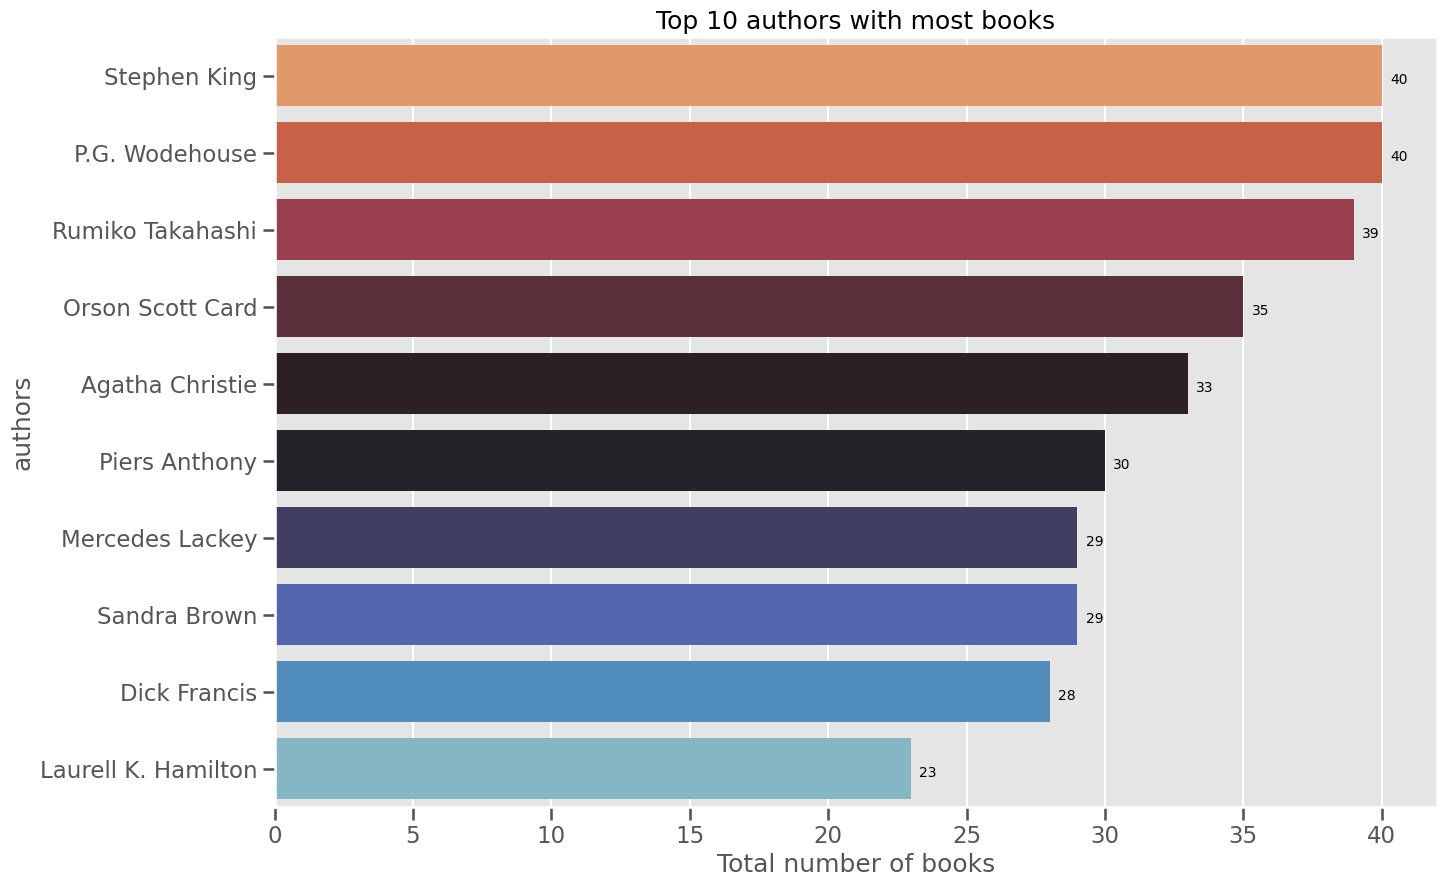

In [53]:
sns.set_context('talk')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_books['title'],y= most_books.index, palette='icefire_r',hue=most_books.index)
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

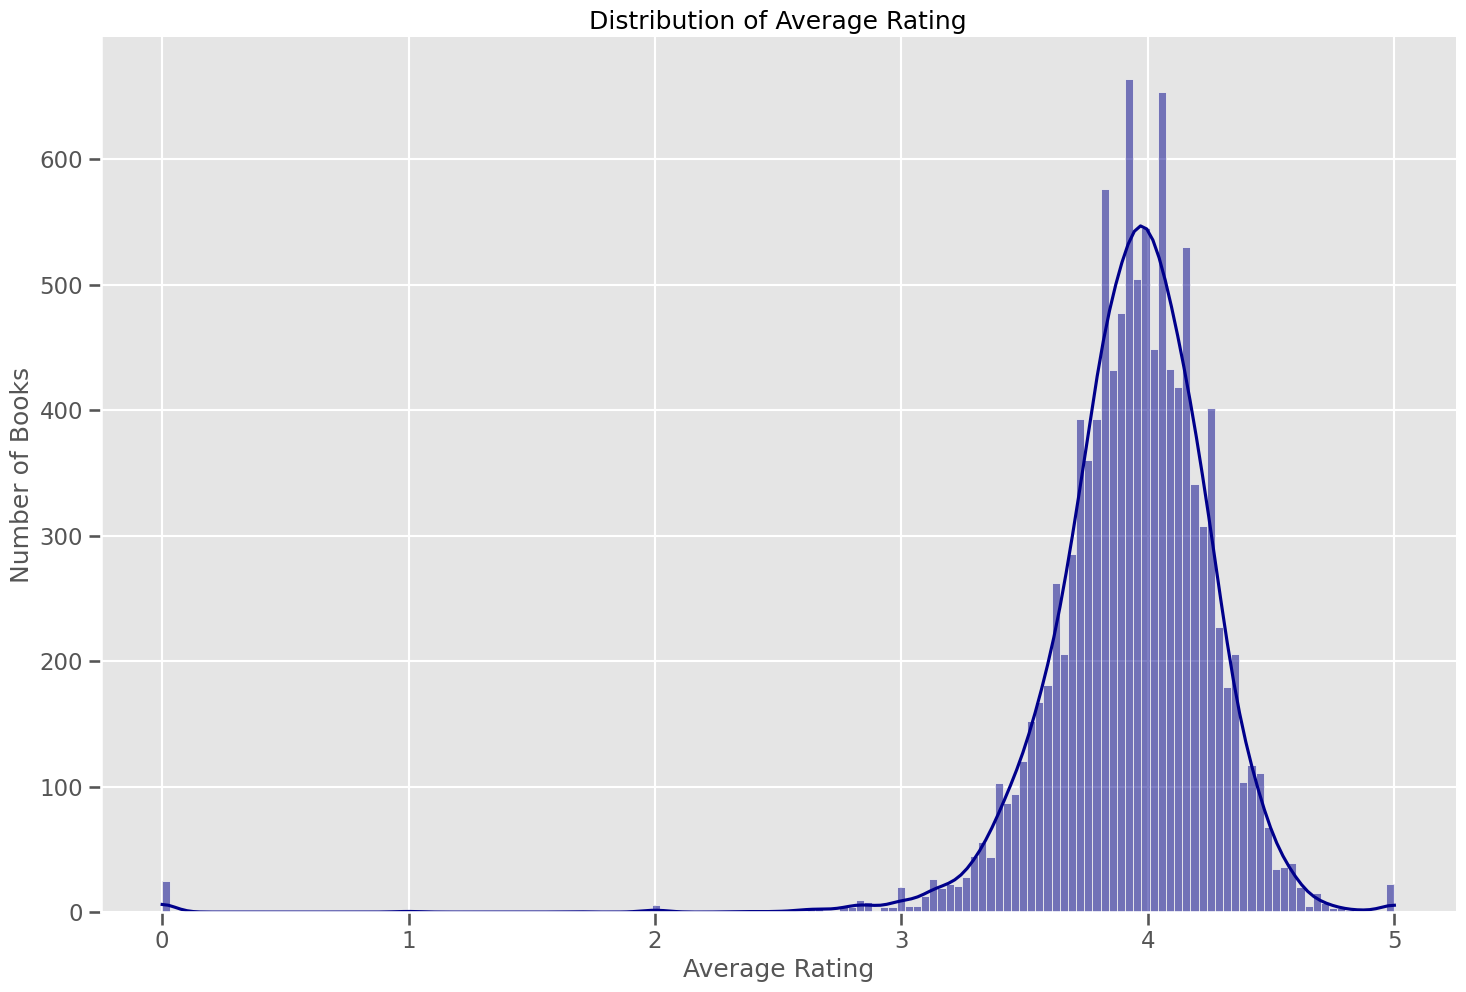

In [54]:
#Plor distribution of the ''average_rating" ? Plot it using a graph of your choice and motivate your choice.
#set figure size
sns.displot(df['average_rating'], kde=True, color='darkblue',height=10, aspect=1.5)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')

plt.show()



The long tail on the left side indicates that while most books have higher average ratings, there are a smaller number with lower ratings. The highest concentration of books is around the rating of 4.

By combining a histogram with a Kernel Density Estimate (KDE) plot, this graph provides both a discrete and a continuous representation of the data distribution. The histogram gives a clear count of books in each rating bin, while the KDE provides a smoothed curve that makes it easier to see the overall shape and trends in the data.


In [55]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [56]:
num_df=['  num_pages'	,'ratings_count'	,'text_reviews_count' ,'average_rating']
df[num_df].corr()

,num_pages,ratings_count,text_reviews_count,average_rating
num_pages,1.000000,0.034337,0.036977,0.150477
ratings_count,0.034337,1.000000,0.865977,0.038224
text_reviews_count,0.036977,0.865977,1.000000,0.033663
average_rating,0.150477,0.038224,0.033663,1.000000


In [57]:
df[num_df].head()

,num_pages,ratings_count,text_reviews_count,average_rating
bookID,,,,
1,652,2095690,27591,4.57
2,870,2153167,29221,4.49
4,352,6333,244,4.42
5,435,2339585,36325,4.56
8,2690,41428,164,4.78


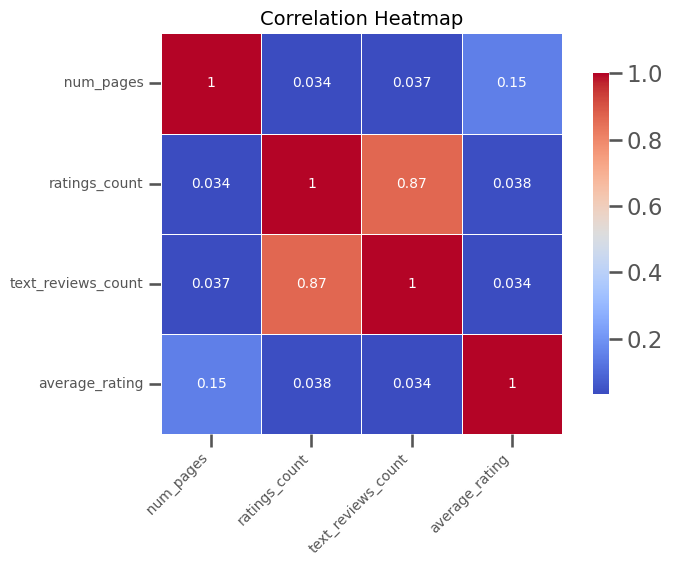

In [58]:

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[num_df].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}, 
    square=True,  
    annot_kws={'size': 10},  
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()


In [85]:
df[num_df].corr()

,num_pages,ratings_count,text_reviews_count,average_rating
num_pages,1.000000,0.034337,0.036977,0.150477
ratings_count,0.034337,1.000000,0.865977,0.038224
text_reviews_count,0.036977,0.865977,1.000000,0.033663
average_rating,0.150477,0.038224,0.033663,1.000000


The correlation heatmap shows weak correlations among the variables, with a notable moderate correlation of 0.87 between 'ratings_count' and 'text_reviews_count'. Other variables, such as 'num_pages' and 'average_rating', exhibit very low correlations with each other.

In [59]:
df[['ratings_count'	,'text_reviews_count' ]]

,ratings_count,text_reviews_count
bookID,,
1,2095690,27591
2,2153167,29221
4,6333,244
5,2339585,36325
8,41428,164
...,...,...
45631,156,20
45633,783,56
45634,820,95


<Figure size 1000x600 with 0 Axes>

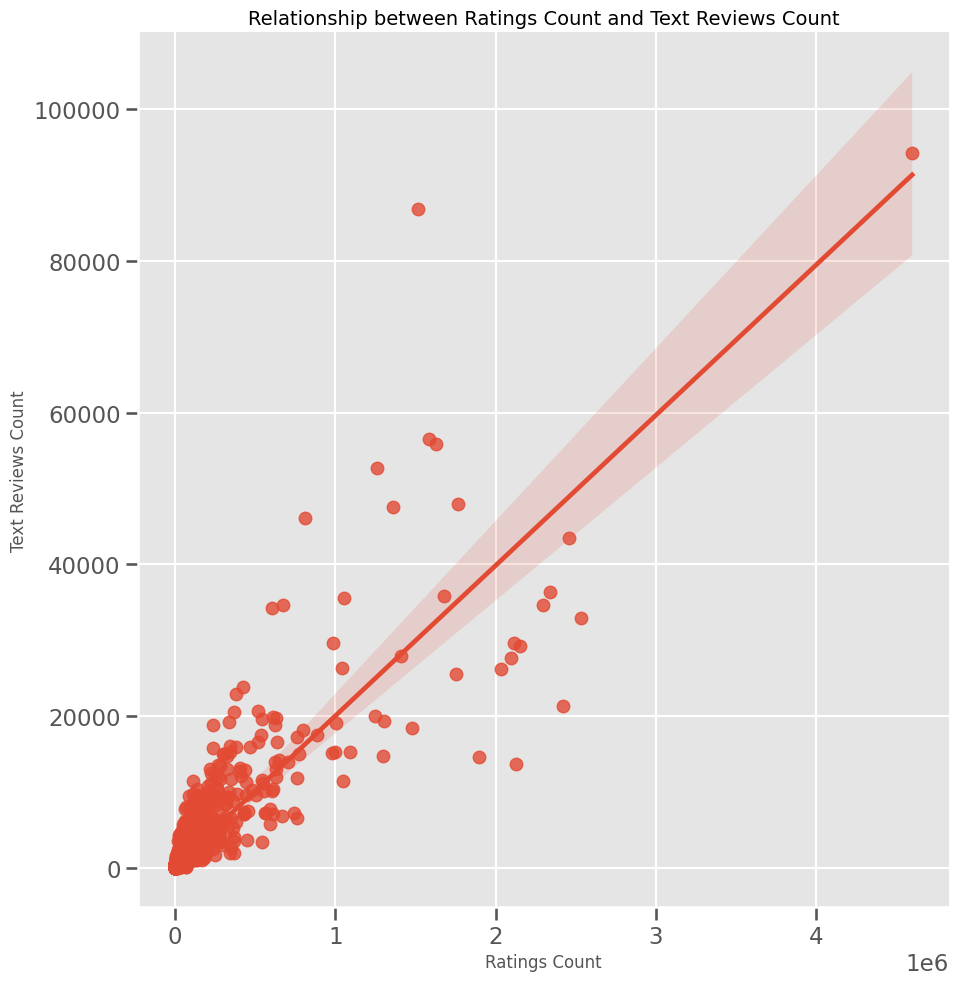

In [60]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='ratings_count', y='text_reviews_count',fit_reg=True, order=1,height=10,aspect=1.0)
plt.title('Relationship between Ratings Count and Text Reviews Count', fontsize=14)
plt.xlabel('Ratings Count', fontsize=12)
plt.ylabel('Text Reviews Count', fontsize=12)

plt.show()


R^2 Score: 0.75


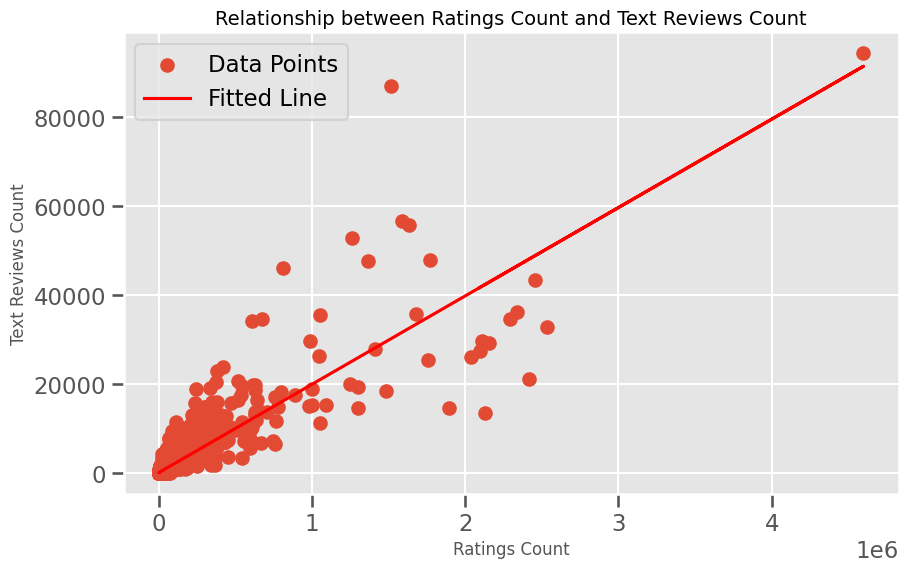

In [61]:
X = df[['ratings_count']]
y = df['text_reviews_count']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R^2 Score: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Relationship between Ratings Count and Text Reviews Count', fontsize=14)
plt.xlabel('Ratings Count', fontsize=12)
plt.ylabel('Text Reviews Count', fontsize=12)
plt.legend()
plt.show()


# PART II : Explore survey data

In [62]:
data=pd.read_csv('/Users/apple/Downloads/OSRI44_dev_data/data.csv',sep="\t")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318573 entries, 0 to 318572
Data columns (total 57 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Q1           318573 non-null  int64 
 1   Q2           318573 non-null  int64 
 2   Q3           318573 non-null  int64 
 3   Q4           318573 non-null  int64 
 4   Q5           318573 non-null  int64 
 5   Q6           318573 non-null  int64 
 6   Q7           318573 non-null  int64 
 7   Q8           318573 non-null  int64 
 8   Q9           318573 non-null  int64 
 9   Q10          318573 non-null  int64 
 10  Q11          318573 non-null  int64 
 11  Q12          318573 non-null  int64 
 12  Q13          318573 non-null  int64 
 13  Q14          318573 non-null  int64 
 14  Q15          318573 non-null  int64 
 15  Q16          318573 non-null  int64 
 16  Q17          318573 non-null  int64 
 17  Q18          318573 non-null  int64 
 18  Q19          318573 non-null  int64 
 19  Q2

I dont see any null values

In [64]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
count,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,...,318573.000000,318573.000000,318573.000000,3.185730e+05,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000,318573.000000
mean,1.955445,3.872020,2.959422,3.220091,2.894866,3.729054,3.311486,3.274647,2.722400,3.645061,...,3.065335,0.911223,1.209428,7.111159e+03,2.243247,1.639552,1.877915,5.042342,2.274888,1.171951
std,1.362475,1.536921,1.674339,1.490337,1.554775,1.348871,1.487084,1.395627,1.543789,1.262263,...,10.577161,1.166674,0.412783,3.808888e+06,0.813903,0.649020,1.231154,1.904835,2.099926,0.459563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,0.000000,1.000000,1.800000e+01,2.000000,1.000000,1.000000,6.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,1.000000,0.000000,1.000000,2.000000e+01,2.000000,2.000000,1.000000,6.000000,1.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,2.000000,1.000000,2.500000e+01,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,162.000000,5.000000,2.000000,2.147484e+09,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


The mean for age seems very off, I need to do a sanity check here

In [65]:
data.query('age<0 or age >100')['age']

720        189
5546      1337
5792       420
6339       534
12262      411
          ... 
285956     115
294067     222
297078     186
305180     212
315256     199
Name: age, Length: 133, dtype: int64

About 133 people have entered their ages wrong

In [66]:
data.isnull().sum().head()

Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
dtype: int64

I am choosing USA as the country for this analysis. So I am filtering out data where country is US

In [67]:
US_data=data[data['country']=='US']
US_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,IPC,source,engnat,age,education,gender,orientation,race,religion,hand
0,1,4,1,5,2,5,1,5,1,4,...,1,1,1,18,2,2,2,6,1,1
3,1,1,4,4,5,4,5,5,4,2,...,1,1,1,19,3,2,1,6,2,1
4,1,2,3,4,3,3,5,1,3,2,...,2,1,1,16,2,1,1,6,2,1
5,1,4,1,1,1,5,4,1,1,4,...,1,0,1,20,2,1,2,6,1,1
6,1,2,3,4,4,4,5,1,3,1,...,2,1,1,16,2,1,1,6,2,1


I checked transpose only to have a better view of the data

In [68]:
T_data=US_data.T
T_data

,0,3,4,5,6,7,8,9,10,11,...,318559,318560,318561,318562,318565,318568,318569,318570,318571,318572
Q1,1,1,1,1,1,1,1,1,1,1,...,1,3,4,3,1,1,5,4,5,1
Q2,4,1,2,4,2,5,5,4,5,4,...,5,5,5,5,4,5,1,1,3,5
Q3,1,4,3,1,3,5,1,5,3,1,...,5,5,4,4,1,5,5,5,5,5
Q4,5,4,4,1,4,5,5,1,5,3,...,5,4,5,5,3,4,5,4,2,1
Q5,2,5,3,1,4,5,2,4,1,2,...,1,2,3,4,2,5,1,5,5,1
Q6,5,4,3,5,4,4,5,4,5,5,...,3,4,5,3,5,2,1,5,2,1
Q7,1,5,5,4,5,1,2,5,4,2,...,5,3,3,3,4,1,5,5,5,3
Q8,5,5,1,1,1,3,3,4,3,3,...,4,5,4,4,2,4,5,5,2,2
Q9,1,4,3,1,3,5,1,5,3,4,...,3,3,2,2,2,2,5,5,5,3
Q10,4,2,2,4,1,4,4,1,3,5,...,5,3,3,4,3,1,1,4,4,1


## Analysis of Responses to Selected Questions Based on Gender

I am supposed to check responses of men and women for 5 different questions. Here are the questions I have selected:

1. **Q14: I dance when I am alone**
2. **Q23: I playfully insult my friends**
3. **Q41: I take stairs two at a time**
4. **Q2: I have thought about dying my hair**
5. **Q33: I hate shopping**

I chose these questions because I felt like there would be a sharp contrast in the answers of men and women.

## Methodology
I am going to plot histograms for these 5 questions. The responses ranged from 1 to 5, where 1 means Disagree and 5 means Agree. In the dataset 0 value have been assigned where data is null or where the participant did not make a choice. I am choosing histogram because I want to see the distribution of responses as it automatically ignores 0. 

## Q14: I dance when I am alone

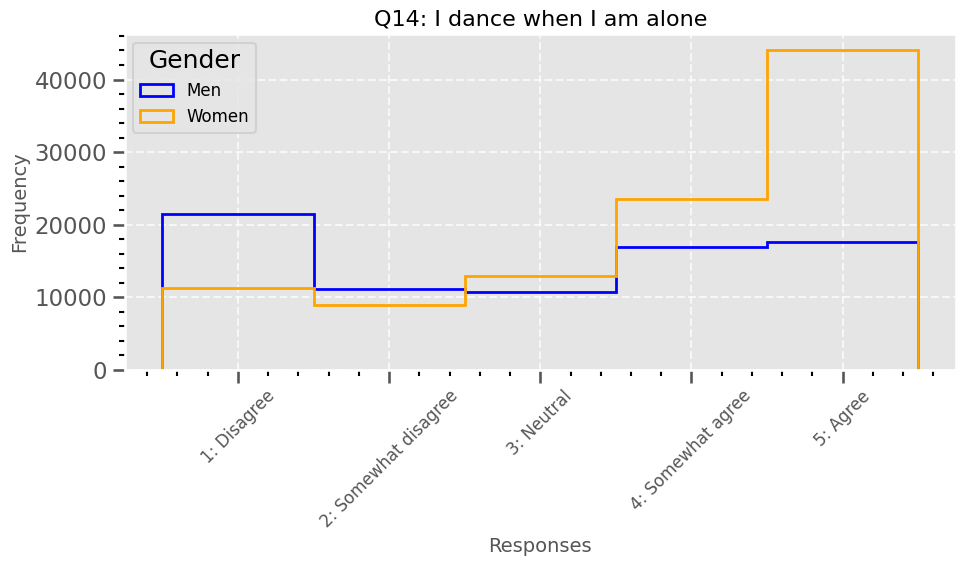

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

ax.hist(US_data.query('gender==1')['Q14'], bins=bins, label='Men', histtype='step', linewidth=2, color='blue')
ax.hist(US_data.query('gender==2')['Q14'], bins=bins, label='Women', histtype='step', linewidth=2, color='orange')

ax.legend(title='Gender', fontsize=12)

ax.set_xlabel('Responses', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.set_title('Q14: I dance when I am alone', fontsize=16)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1: Disagree', '2: Somewhat disagree', '3: Neutral', '4: Somewhat agree', '5: Agree'], fontsize=12)

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.grid(True, linestyle='--', alpha=0.7)
ax.minorticks_on()
ax.tick_params(which='minor', length=4, color='black')
plt.tight_layout()

plt.show()


In [18]:
US_data.query('gender==2')['Q14'].value_counts().sort_index()

Q14
0      295
1    11318
2     8947
3    12951
4    23552
5    44026
Name: count, dtype: int64

## Observations:
The contrast is particularly sharp for the extreme responses (1: Disagree and 5: Agree), with many more men disagreeing and many more women agreeing.


## Q23: I playfully insult my friends.

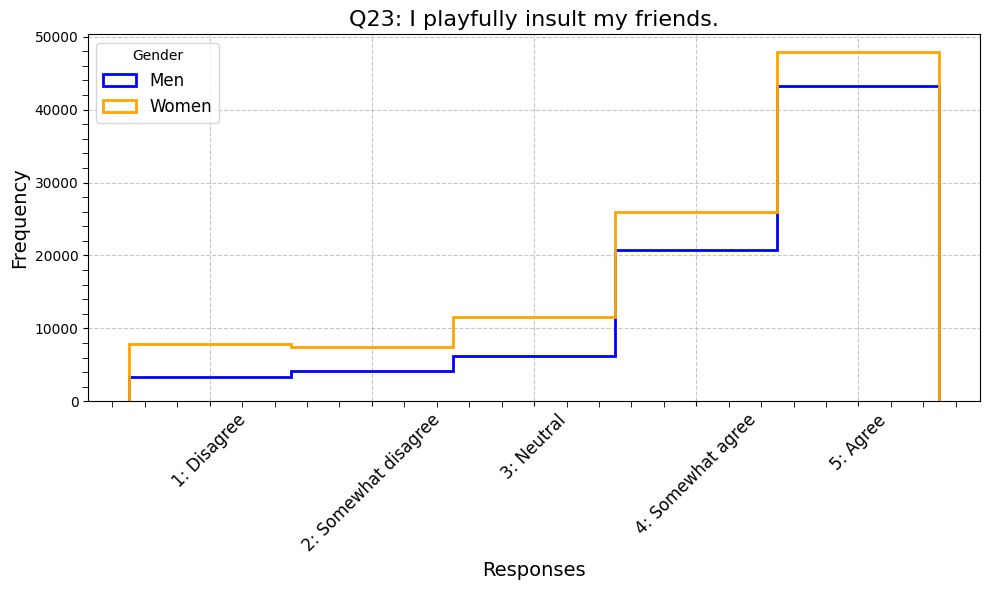

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

ax.hist(US_data.query('gender==1')['Q23'], bins=bins, label='Men', histtype='step', linewidth=2, color='blue')
ax.hist(US_data.query('gender==2')['Q23'], bins=bins, label='Women', histtype='step', linewidth=2, color='orange')

ax.legend(title='Gender', fontsize=12)

ax.set_xlabel('Responses', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.set_title('Q23: I playfully insult my friends.', fontsize=16)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1: Disagree', '2: Somewhat disagree', '3: Neutral', '4: Somewhat agree', '5: Agree'], fontsize=12)

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.grid(True, linestyle='--', alpha=0.7)
ax.minorticks_on()
ax.tick_params(which='minor', length=4, color='black')
plt.tight_layout()

plt.show()





## Observations

A significant number of both men and women agree with the statement. However, the number of women who agree is slightly higher than the number of men. Interesting :D

## Q41 : I take stairs two at a time'

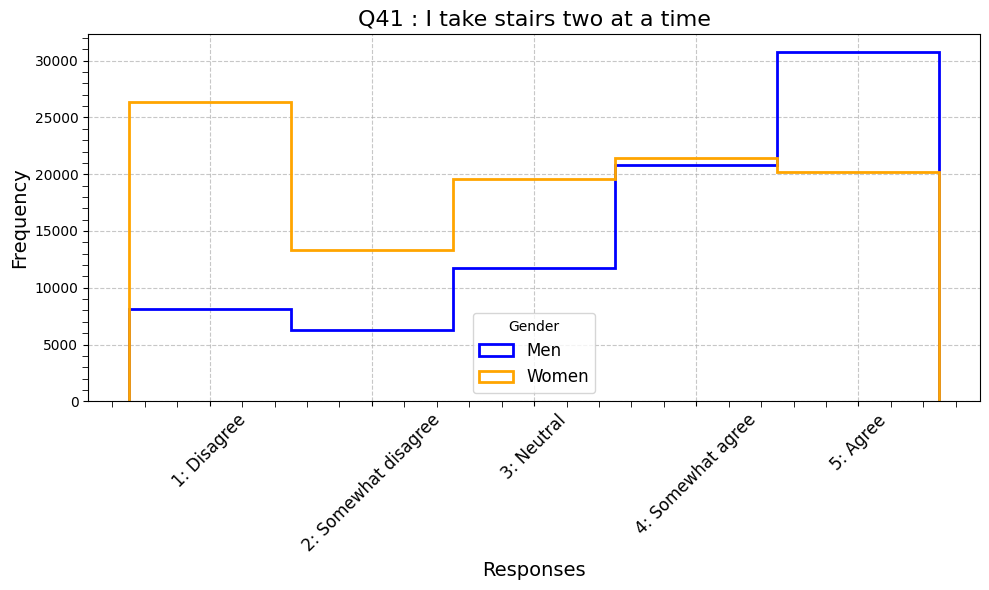

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

ax.hist(US_data.query('gender==1')['Q41'], bins=bins, label='Men', histtype='step', linewidth=2, color='blue')
ax.hist(US_data.query('gender==2')['Q41'], bins=bins, label='Women', histtype='step', linewidth=2, color='orange')

ax.legend(title='Gender', fontsize=12)

ax.set_xlabel('Responses', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.set_title('Q41 : I take stairs two at a time', fontsize=16)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1: Disagree', '2: Somewhat disagree', '3: Neutral', '4: Somewhat agree', '5: Agree'], fontsize=12)

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.grid(True, linestyle='--', alpha=0.7)
ax.minorticks_on()
ax.tick_params(which='minor', length=4, color='black')
plt.tight_layout()

plt.show()




## Observations

There is a sharp contrast between responses of men and women for this question. Men are more likely to take two stairs at a time while most women disagree that taking two stairs at a time is a good idea. However a significant number of women also agree with this statement.

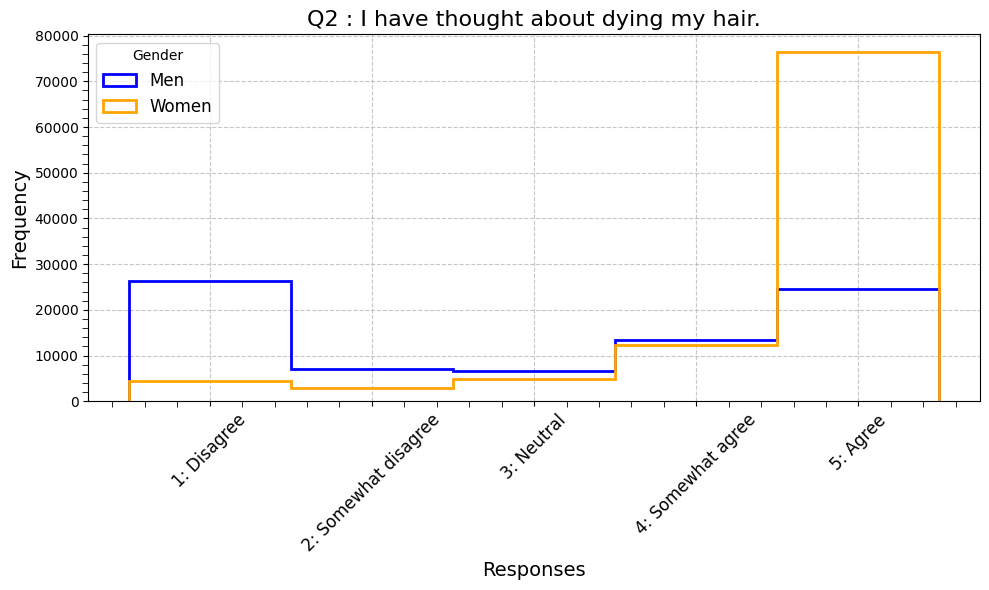

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

ax.hist(US_data.query('gender==1')['Q2'], bins=bins, label='Men', histtype='step', linewidth=2, color='blue')
ax.hist(US_data.query('gender==2')['Q2'], bins=bins, label='Women', histtype='step', linewidth=2, color='orange')

ax.legend(title='Gender', fontsize=12)

ax.set_xlabel('Responses', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.set_title('Q2 : I have thought about dying my hair.', fontsize=16)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1: Disagree', '2: Somewhat disagree', '3: Neutral', '4: Somewhat agree', '5: Agree'], fontsize=12)

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.grid(True, linestyle='--', alpha=0.7)
ax.minorticks_on()
ax.tick_params(which='minor', length=4, color='black')
plt.tight_layout()

plt.show()





## Observations

Agreement and disagreeement is balanced here for men but women stronly agree that they have thought about dying their hair

## Q33: I hate shopping.

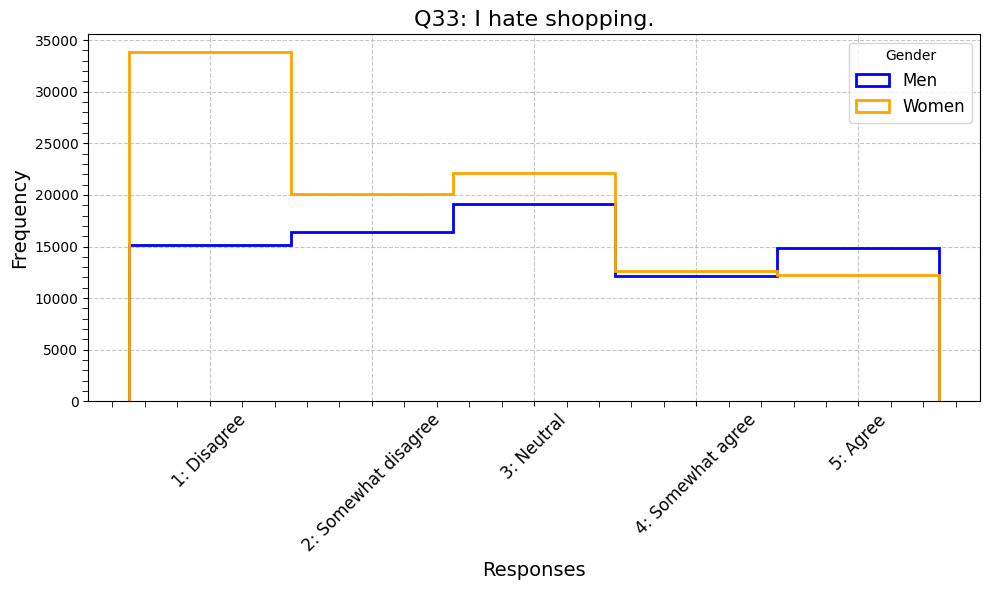

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

ax.hist(US_data.query('gender==1')['Q33'], bins=bins, label='Men', histtype='step', linewidth=2, color='blue')
ax.hist(US_data.query('gender==2')['Q33'], bins=bins, label='Women', histtype='step', linewidth=2, color='orange')

ax.legend(title='Gender', fontsize=12)

ax.set_xlabel('Responses', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.set_title('Q33: I hate shopping.', fontsize=16)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1: Disagree', '2: Somewhat disagree', '3: Neutral', '4: Somewhat agree', '5: Agree'], fontsize=12)

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

ax.grid(True, linestyle='--', alpha=0.7)
ax.minorticks_on()
ax.tick_params(which='minor', length=4, color='black')
plt.tight_layout()

plt.show()

## Observations

Women strongly disagree with the statement that they hate shopping however men have no clear
agreement or disagreement.